In [47]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/My Drive/linear_regression')
from utils import *
import copy
import math
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
def load_data():
    data = np.loadtxt("/content/drive/My Drive/linear_regression/data/ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

def load_data_multi():
    data = np.loadtxt("/content/drive/My Drive/linear_regression/data/ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y



Suppose you are considering different cities for opening a new outlet.

You would like to expand your business to cities that may give your restaurant higher profits.
The chain already has restaurants in various cities and you have data for profits and populations from the cities.
You also have data on cities that are candidates for a new restaurant.
For these cities, you have the city population.

x_train is the population of a city

y_train is the profit of a restaurant in that city. 

A negative value for profit indicates a loss.


In [49]:
# carregando data/ex1data1
drive.mount('/content/drive')
sys.path.insert(0,'/content/drive/My Drive/linear_regression')
x_train, y_train = load_data()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# print x_train
print("Tipo de x_train:",type(x_train))
print("Primeiros 5 elementos de x_train are:\n", x_train[:5]) 

Tipo de x_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [51]:
# print y_train
print("Tipo of y_train:",type(y_train))
print("Primeiros 5 elementos de y_train:\n", y_train[:5])  

Tipo of y_train: <class 'numpy.ndarray'>
Primeiros 5 elementos de y_train:
 [17.592   9.1302 13.662  11.854   6.8233]


In [54]:
# dimensoes das variaveis 
print ('Shape de x_train:', x_train.shape)
print ('Shape de y_train: ', y_train.shape)
print ('Numero de exemplos de treino (m):', len(x_train))

Shape de x_train: (97,)
Shape de y_train:  (97,)
Numero de exemplos de treino (m): 97


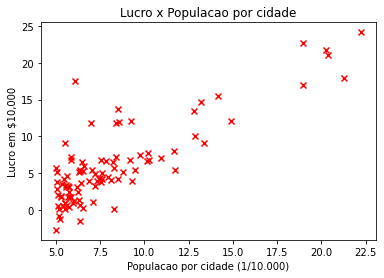

In [55]:
# scatter plot
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Lucro x Populacao por cidade")
plt.ylabel('Lucro em $10,000')
plt.xlabel('Populacao por cidade (1/10.000)')
plt.show()

In [56]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # numero de exemplos de treino 
    m = x.shape[0] 
    
    total_cost = 0
    cost=0
    for i in range(m):
        f_wb = w*x[i]+b
        cost += (f_wb - y[i])**2
    
    total_cost = cost/(2*m)

    return total_cost

In [57]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # numero de exemplos de treino 
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]
        dj_dw += (f_wb - y[i])*x[i]
    dj_dw /= m
    dj_db /= m
        
    return dj_dw, dj_db

In [58]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # numero de exemplos de treino 
    m = len(x)
    
    # array armazena custo J e w a cada iteracao — visualizacao
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # evita modificar global w dentro da funcao
    b = b_in
    
    for i in range(num_iters):

        # calcula o gradiente e atualiza parametros
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # atualiza parametros usando w, b, alpha e gradiente
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # salva custo J a cada iteracao
        if i<100000:      # previne exaustao de recurso
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # printa custo a cada intevalo 10x se if<10 
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history # retorna w e J,w history para grafico

In [59]:
# inicializando parametros, shape de w = (n,) 
initial_w = 0.
initial_b = 0.

# gradient descent parametros
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [60]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Populacao da cidade (1/10.000)')

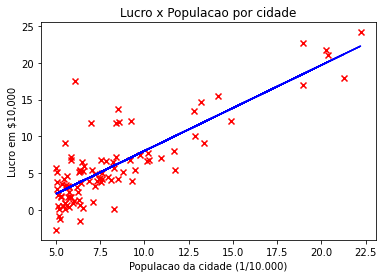

In [61]:
# plotando linha 
plt.plot(x_train, predicted, c = "b")

# scatter plot dos dados
plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Lucro x Populacao por cidade")
plt.ylabel('Lucro em $10,000')
plt.xlabel('Populacao da cidade (1/10.000)')

In [62]:
predict1 = 3.5 * w + b
print('Para populacao = 35,000, foi previsto um lucro de $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('Para populacao = 70,000, foi previsto um lucro de $%.2f' % (predict2*10000))

Para populacao = 35,000, foi previsto um lucro de $4519.77
Para populacao = 70,000, foi previsto um lucro de $45342.45
